In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import glob,os,pdb
%matplotlib ipympl

In [2]:
ch4_darks = sorted(glob.glob('2024/**/*CH4*.nc',recursive=True))
ch4_darks.extend(sorted(glob.glob('2025/**/*CH4*.nc',recursive=True)))

o2_darks = sorted(glob.glob('2024/**/*O2*.nc',recursive=True))
o2_darks.extend(sorted(glob.glob('2025/**/*O2*.nc',recursive=True)))

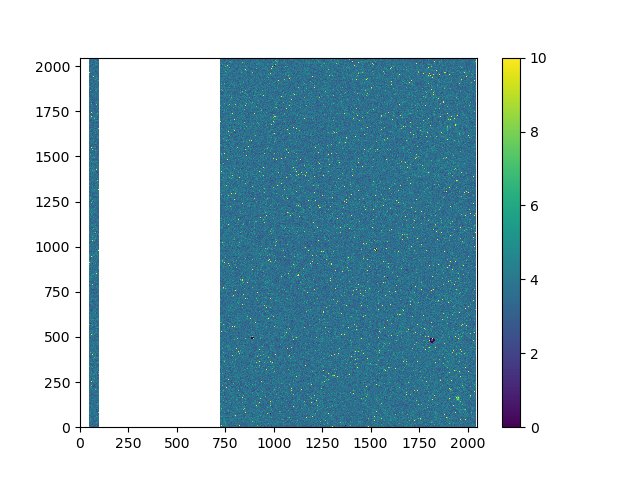

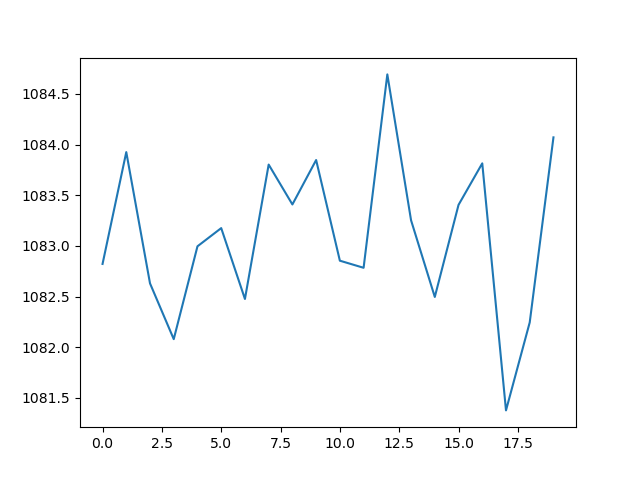

In [3]:
f = Dataset(o2_darks[3])
dn = f['Frame/PixelData'][:]
plt.figure(); plt.pcolormesh(dn.std(0),vmax=10); plt.colorbar()
plt.figure(); plt.plot(dn[:,1000:1100,1000:1100].mean(1).mean(1))

In [4]:
ch4_dark_roi = np.zeros((20*len(ch4_darks)))
i = 0
fi = []
has_nans = {}
for ifi,f in enumerate(ch4_darks[:]):
    dn = Dataset(f)['Frame/PixelData'][:,1000:1100,1000:1100].mean((1,2))
    if len(np.where(dn.mask)[0]) > 0:
        has_nans[f] = np.where(dn.mask)[0]
    dn[np.where(dn.mask)[0]] = np.nan
    ch4_dark_roi[i:i+len(dn)] = dn[:].data    
    print(ch4_darks[ifi])
    fi.extend([ifi for j in range(len(dn))])
    i+=len(dn)


2024/06/14/00430001/po-1982/MethaneSAT_L0_CH4_Dark_0_00430001.nc
2024/06/15/00530001/202407311706/MethaneSAT_L0_CH4_Dark_0_00530001.nc
2024/06/21/00680001/po-1991/MethaneSAT_L0_CH4_Dark_0_00680001.nc
2024/06/21/00690001/po-1991/MethaneSAT_L0_CH4_Dark_0_00690001.nc
2024/06/21/006A0001/po-1991/MethaneSAT_L0_CH4_Dark_0_006A0001.nc
2024/06/22/00780001/po-2017/MethaneSAT_L0_CH4_Dark_0_00780001.nc
2024/06/22/00790001/po-2073/MethaneSAT_L0_CH4_Dark_0_00790001.nc
2024/07/19/00A30001/po-2065/MethaneSAT_L0_CH4_Dark_0_00A30001.nc
2024/07/19/00A30001/po-2067/MethaneSAT_L0_CH4_Dark_0_00A30001.nc
2024/07/19/00A40001/po-2065/MethaneSAT_L0_CH4_Dark_0_00A40001.nc
2024/07/19/00A40001/po-2067/MethaneSAT_L0_CH4_Dark_0_00A40001.nc
2024/07/19/00A50001/po-2065/MethaneSAT_L0_CH4_Dark_0_00A50001.nc
2024/07/19/00A50001/po-2067/MethaneSAT_L0_CH4_Dark_0_00A50001.nc
2024/07/19/00A60001/po-2065/MethaneSAT_L0_CH4_Dark_0_00A60001.nc
2024/07/19/00A60001/po-2067/MethaneSAT_L0_CH4_Dark_0_00A60001.nc
2024/07/19/00A70001/

/tmp/ipykernel_13276/4002063745.py:7: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  if len(np.where(dn.mask)[0]) > 0:
/tmp/ipykernel_13276/4002063745.py:9: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  dn[np.where(dn.mask)[0]] = np.nan


2025/05/24/0C1F0001/202505311747_po-2542/MethaneSAT_L0_CH4_Dark_0_0C1F0001.nc
2025/05/28/0C300001/202506011747_po-2543/MethaneSAT_L0_CH4_Dark_0_0C300001.nc
2025/05/28/0C310001/202506011747_po-2543/MethaneSAT_L0_CH4_Dark_0_0C310001.nc
2025/05/28/0C320001/202506011747_po-2543/MethaneSAT_L0_CH4_Dark_0_0C320001.nc
2025/05/28/0C330001/202506011747_po-2543/MethaneSAT_L0_CH4_Dark_0_0C330001.nc
2025/05/29/0C3A0001/202506021800_po-2545/MethaneSAT_L0_CH4_Dark_0_0C3A0001.nc
2025/05/30/0C4E0001/202506021800_po-2545/MethaneSAT_L0_CH4_Dark_0_0C4E0001.nc
2025/05/30/0C4F0001/202506021800_po-2545/MethaneSAT_L0_CH4_Dark_0_0C4F0001.nc
2025/05/30/0C500001/202506021800_po-2545/MethaneSAT_L0_CH4_Dark_0_0C500001.nc
2025/05/30/0C510001/202506021800_po-2545/MethaneSAT_L0_CH4_Dark_0_0C510001.nc
2025/05/31/0C560001/202506021800_po-2545/MethaneSAT_L0_CH4_Dark_0_0C560001.nc
2025/05/31/0C570001/202506021800_po-2545/MethaneSAT_L0_CH4_Dark_0_0C570001.nc
2025/05/31/0C580001/202506021800_po-2545/MethaneSAT_L0_CH4_Dark_

In [7]:
has_nans

{'2024/09/01/00F20001/po-2075/MethaneSAT_L0_CH4_Dark_0_00F20001.nc': array([ 7, 14]),
 '2024/09/25/01B40001/202410051310_po-2126/MethaneSAT_L0_CH4_Dark_0_01B40001.nc': array([0]),
 '2024/09/26/01C40001/202410021348_po-2120/MethaneSAT_L0_CH4_Dark_0_01C40001.nc': array([0]),
 '2024/09/27/01C60001/202410021348_po-2120/MethaneSAT_L0_CH4_Dark_0_01C60001.nc': array([0]),
 '2024/09/28/01C80001/202410021348_po-2120/MethaneSAT_L0_CH4_Dark_0_01C80001.nc': array([0]),
 '2024/09/28/01C90001/202410021348_po-2120/MethaneSAT_L0_CH4_Dark_0_01C90001.nc': array([0]),
 '2024/09/29/01D10001/202410051310_po-2126/MethaneSAT_L0_CH4_Dark_0_01D10001.nc': array([0]),
 '2024/09/29/01D20001/202410051310_po-2126/MethaneSAT_L0_CH4_Dark_0_01D20001.nc': array([0]),
 '2024/10/01/01EB0001/202410061308_po-2128/MethaneSAT_L0_CH4_Dark_0_01EB0001.nc': array([0]),
 '2024/10/01/01EC0001/202410061308_po-2128/MethaneSAT_L0_CH4_Dark_0_01EC0001.nc': array([0]),
 '2024/10/02/01F20001/202410071521_po-2129/MethaneSAT_L0_CH4_Dark_0_

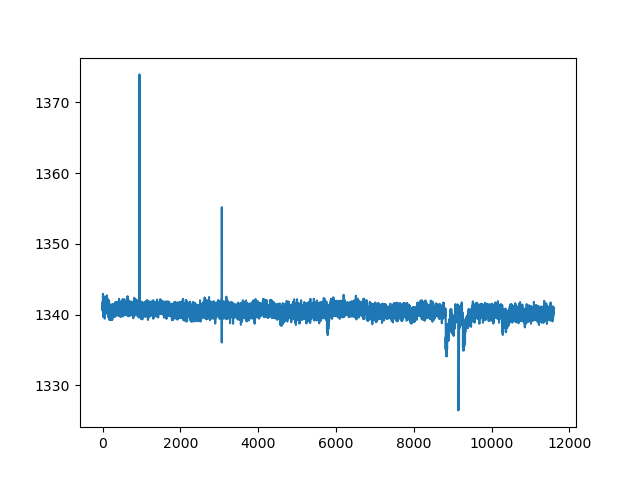

In [100]:
plt.plot(ch4_dark_roi[:i])

In [69]:
np.where(np.array(fi)==94)[0]
dn = Dataset(ch4_darks[94])['Frame/PixelData'][:]

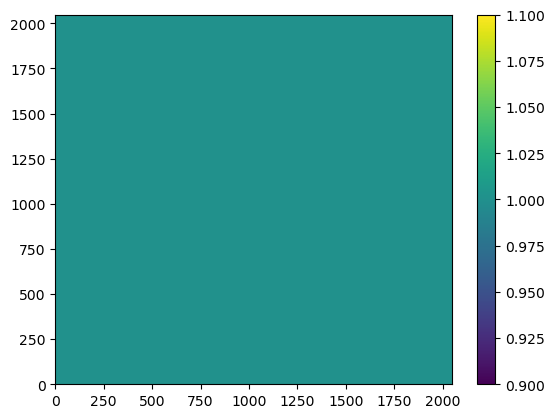

In [77]:
plt.pcolormesh(dn[0].mask); plt.colorbar()

In [89]:
o2_dark_roi = np.zeros((20*len(o2_darks)))
i = 0
fi = []
has_nans = {}
for ifi,f in enumerate(o2_darks[:]):
    dn = Dataset(f)['Frame/PixelData'][:,1000:1100,1000:1100].mean((1,2))
    if len(np.where(dn.mask)[0]) > 0:
        has_nans[f] = np.where(dn.mask)[0]
    dn[np.where(dn.mask)[0]] = np.nan
    o2_dark_roi[i:i+len(dn)] = dn[:].data    
    print(o2_darks[ifi])
    fi.extend([ifi for j in range(len(dn))])
    i+=len(dn)

array([          nan, 1340.746     , 1340.0520202 , 1340.1733    ,
       1341.2409    , 1340.6347    , 1339.52787879, 1340.25      ,
       1340.5734    , 1339.90666667, 1340.5025    , 1340.6669    ,
       1340.4887    , 1341.79656566, 1340.2956    , 1340.5673    ,
       1339.92989899, 1340.63565657, 1340.6093    , 1340.6304    ,
       1341.06181818])